# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [10]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [11]:
from maddpg_Agent import MADDPGAGENT
import torch
import random
import numpy as np
import time

import matplotlib.pyplot as plt
from collections import deque


In [12]:
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [13]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [14]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [15]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291


In [16]:
import workspace_utils
from workspace_utils import active_session

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [17]:
def ddpg_control(num_episodes=6000,max_t=1000,train_mode=True,print_every=1):
    ## mean scores from recent episodes
    scores_window = deque(maxlen=100)
    #max_score = []
    scores_hold = []
    average = []
    fitting_point = 0.0
    bst_episode = 0
    noise_accumulate = True 
    
    for i_episode in range(1,num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] #resetting the environment
        states = np.reshape(env_info.vector_observations,(1,48)) # current state (observation)
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            action0 = agent_0.act(states,noise_accumulate=noise_accumulate) #choosing action
            action1 = agent_1.act(states,noise_accumulate=noise_accumulate)
            actions = np.concatenate((action0,action1),axis=0).flatten() #multi dimensional list 
            env_info = env.step(actions)[brain_name] #passing the actions into environment
            next_states = np.reshape(env_info.vector_observations,(1,48)) #picking up the next state
            rewards = env_info.rewards # rewards you earn
            dones = env_info.local_done # notifying the status of the episode ( completed or not)
            
            agent_0.step(states,actions,rewards[0],next_states,dones,agent_num=0)
            agent_1.step(states,actions,rewards[1],next_states,dones,agent_num=1)
            
            scores += np.max(rewards)
            
            states = next_states
            
            if np.any(dones):
                break
        
        best_score = np.max(scores)
        scores_window.append(best_score)  #appending to scores windoow
        scores_hold.append(best_score)
        average.append(np.mean(scores_window))
        #average estimation
        
        if best_score > fitting_point:
            fitting_point = best_score
            bst_episode = i_episode
            
        
        if i_episode % print_every == 0 :
            print('\rEpisode {} -- \tAverage: {:.3f} \t best_Score: {:.3f}'.format(
                  i_episode,np.mean(scores_window), fitting_point))
            torch.save(agent_0.actor_local.state_dict(),'ckpt_actor1.pth')
            torch.save(agent_0.critic_local.state_dict(),'ckpt_critic1.pth')
            torch.save(agent_1.actor_local.state_dict(),'ckpt_actor2.pth')
            torch.save(agent_1.critic_local.state_dict(),'ckpt_critic2.pth')
        
            
        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent_0.actor_local.state_dict(),'ckpt_actor1.pth')
            torch.save(agent_0.critic_local.state_dict(),'ckpt_critic1.pth')
            torch.save(agent_1.actor_local.state_dict(),'ckpt_actor2.pth')
            torch.save(agent_1.critic_local.state_dict(),'ckpt_critic2.pth')
            break

    return scores_hold, average

In [18]:
with active_session():
    agent_0 = MADDPGAGENT(state_size = state_size , action_size = action_size , random_seed = 0 , agents = 1)
    agent_1 = MADDPGAGENT(state_size = state_size , action_size = action_size , random_seed = 0 , agents = 1)
    scores,avg = ddpg_control()

Episode 1 -- 	Average: 0.000 	 best_Score: 0.000
Episode 2 -- 	Average: 0.000 	 best_Score: 0.000
Episode 3 -- 	Average: 0.000 	 best_Score: 0.000
Episode 4 -- 	Average: 0.000 	 best_Score: 0.000
Episode 5 -- 	Average: 0.000 	 best_Score: 0.000
Episode 6 -- 	Average: 0.000 	 best_Score: 0.000
Episode 7 -- 	Average: 0.000 	 best_Score: 0.000
Episode 8 -- 	Average: 0.000 	 best_Score: 0.000
Episode 9 -- 	Average: 0.000 	 best_Score: 0.000
Episode 10 -- 	Average: 0.000 	 best_Score: 0.000
Episode 11 -- 	Average: 0.000 	 best_Score: 0.000
Episode 12 -- 	Average: 0.000 	 best_Score: 0.000
Episode 13 -- 	Average: 0.000 	 best_Score: 0.000
Episode 14 -- 	Average: 0.000 	 best_Score: 0.000
Episode 15 -- 	Average: 0.000 	 best_Score: 0.000
Episode 16 -- 	Average: 0.000 	 best_Score: 0.000
Episode 17 -- 	Average: 0.006 	 best_Score: 0.100
Episode 18 -- 	Average: 0.022 	 best_Score: 0.300
Episode 19 -- 	Average: 0.021 	 best_Score: 0.300
Episode 20 -- 	Average: 0.020 	 best_Score: 0.300
Episode 2

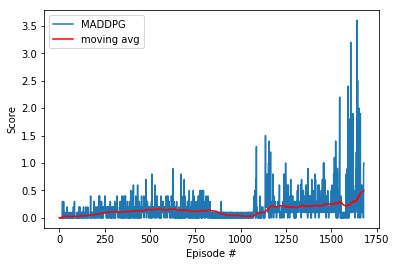

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avg, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [20]:
env.close()